In [50]:
import json
import numpy as np
import matplotlib.pyplot as plt
from util.metrics import calc_mc_accuracy, calc_mc_set_accuracy

## Load experiment data

In [64]:
# e_name = 'mnist_gan2_mcc_experiment_2574'
# e_name = 'experiment_8944'
e_name = 'test'

# Import results
# with open('experiments/experiment_' + str(eid) + '.json') as f:
with open('experiments/' + str(e_name) + '.json') as f:
    log = json.loads(f.read())

print('Loaded experiment log with id ' + str(log['id']))
# print('Performed attacks: {0}'.format(log['attacks']))
# print('Repetitions: {0}'.format(len(log[log['attacks'][0]]['results'])))

Loaded experiment log with id 1131


In [69]:
attacks = ['legacy_pca_mc_category_attack_1000', 'legacy_pca_mc_category_attack_10000']

In [65]:
attacks = log['attacks']

In [70]:
# Collect and aggregate result values

values = dict()

for attack in attacks: #log['attacks']:
    
    values[attack] = dict()
    
    results = log[attack]['results']
    # print(results)
    
    config_name = log[attack]['base_config']
    # config_name = 'pca_mc_category_attack'
    
    with open('configs/' + str(config_name) + '.json') as f:
        attack_config = json.loads(f.read())
    with open('configs/' + str(log['model']) + '.json') as f:
        model_config = json.loads(f.read())
    
    # print(attack_config)
    # print(model_config)
    # print(log[attack]['attack_type'])
    
    if 'mc_attack' in log[attack]['attack_type'] or 'mc_category_attack' in log[attack]['attack_type']:
    
        # Heuristics
        heuristics = results[0].keys()
        
        for heuristic in heuristics:
            
            values[attack][heuristic] = dict()
            values[attack][heuristic]['single'] = list()
            values[attack][heuristic]['set'] = list()
            
            # Single MI Accuracy
            single_mi_acc = calc_mc_accuracy(heuristic, 'mc_attack_log_acc', results)
            values[attack][heuristic]['single'].append(single_mi_acc)
            # print(heuristic, single_mi_acc)
            
            # Set MI Accuracy
            set_mi_acc = calc_mc_set_accuracy(heuristic, 'mc_attack_log_acc', results)
            values[attack][heuristic]['set'].append(set_mi_acc)
            # print(set_mi_acc)
    
    elif log[attack]['attack_type'] == 'reconstruction_attack':
        values[attack]['reconstruction_accuracy_single'] = np.mean([x['reconstruction_accuracy'] for x in results])
        values[attack]['reconstruction_accuracy_set'] = (sum([x['successful_set_attack'] for x in results]) / len(results))

In [71]:
values

{'legacy_pca_mc_category_attack_1000': {'median': {'single': [0.53],
   'set': [0.8]},
  '0.01': {'single': [0.5200000000000001], 'set': [0.6]},
  '0.1': {'single': [0.496], 'set': [0.2]},
  '1': {'single': [0.534], 'set': [0.7]}},
 'legacy_pca_mc_category_attack_10000': {'median': {'single': [0.53],
   'set': [0.8]},
  '0.01': {'single': [0.48600000000000004], 'set': [0.4]},
  '0.1': {'single': [0.5199999999999999], 'set': [0.6]},
  '1': {'single': [0.534], 'set': [0.8]}}}

## Plots for Monte Carlo Attacks

### Create Plot for different Sample Sizes

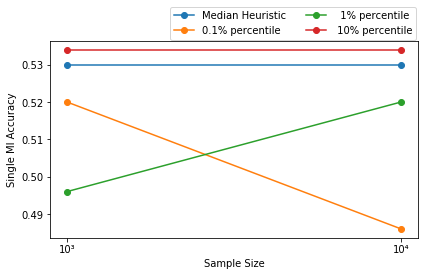

In [73]:
# Show single membership inference results

import matplotlib.pyplot as plt
import numpy as np

heuristics = results[0].keys()
attacks = values.keys()
# xlabels = ['10\u00b3', '10\u2074', '10\u2075', '10\u2076']
xlabels = ['10\u00b3', '10\u2074']
plt.xticks(range(len(xlabels)), xlabels)
#plt.figure(figsize=(10, 6))

for heuristic in heuristics:
    
    # Aggregate results
    mean_single_accs = [np.array(values[attack][heuristic]['single']).mean() for attack in attacks]
    
    if heuristic != 'median':
        label = '{:3g}% percentile'.format(float(heuristic) * 10)
    else:
        label = 'Median Heuristic'
    
    plt.plot(range(len(xlabels)), mean_single_accs, marker='o', label=label)
    
plt.xlabel('Sample Size')
plt.ylabel('Single MI Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(1.01, 1.2), ncol=2);
plt.tight_layout()
#plt.savefig('figures/mnist_gan_mc_category_single_accs.png')

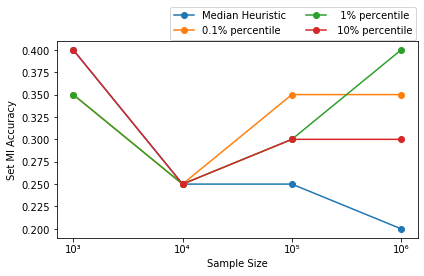

In [63]:
# Show set membership inference results

heuristics = results[0].keys()
attacks = values.keys()
x = ['10\u00b3', '10\u2074', '10\u2075', '10\u2076']
#print(heuristics)
#print(attacks)

#plt.xlim(100, 1000000)
plt.xticks(range(len(x)), x)
plt.xlabel('Sample Size')
plt.ylabel('Set MI Accuracy')

for heuristic in heuristics:
    
    # Aggregate results
    mean_set_accs = [np.array(values[attack][heuristic]['set']).mean() for attack in attacks]
    
    if heuristic != 'median':
        label = '{:3g}% percentile'.format(float(heuristic) * 10)
    else:
        label = 'Median Heuristic'
    
    plt.plot(range(len(x)), mean_set_accs, marker='o', label=label)

# plt.figure(figsize=(10, 6))
plt.legend(loc='upper right', bbox_to_anchor=(1.01, 1.2), ncol=2);
plt.tight_layout()
#plt.savefig('figures/mnist_gan_mc_category_set_accs.png')

### Create Boxplot for different Metrics (over multiple Runs)

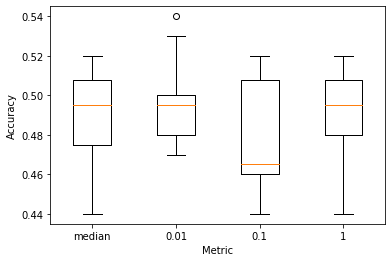

In [27]:
# Show single membership inference results

import matplotlib.pyplot as plt
import numpy as np

heuristics = results[0].keys()
attacks = values.keys()
#xlabels = ['10\u00b3', '10\u2074', '10\u2075', '10\u2076']
#xlabels = [1000, 10000, 100000, 1000000]


x = list()

for heuristic in heuristics:
    x.append([e[heuristic]['mc_attack_log_acc'] for e in log['pca_mc_category_attack_1000']['results']])


plt.boxplot(x)
plt.ylabel('Accuracy')
plt.xlabel('Metric')
plt.xticks(range(1, len(heuristics) + 1), heuristics)
# plt.show()
# plt.savefig('test.png')

In [66]:
# Show single membership inference results

import matplotlib.pyplot as plt
import numpy as np

heuristics = log['results'][0].keys()
x = list()

for heuristic in heuristics:
    x.append([e[heuristic]['mc_attack_log_acc'] for e in log['results']])

plt.figure(figsize=(10, 6))
plt.boxplot(x)
plt.ylabel('Accuracy')
plt.xlabel('Metric')
plt.xticks(range(1, len(heuristics) + 1), heuristics)
plt.show()

# plt.savefig('test.png')

KeyError: 'results'

### Barplot for Set MI (over multiple Runs)

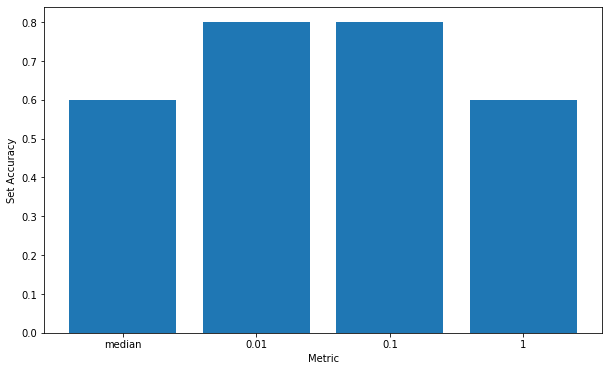

In [49]:
import matplotlib.pyplot as plt
import numpy as np

heuristics = log['results'][0].keys()
x = list()

for heuristic in heuristics:
    x.append(sum([e[heuristic]['successful_set_attack_log'] for e in log['results']]) / len(log['results']))

plt.figure(figsize=(10, 6))
plt.bar(height=x, x=heuristics)
plt.ylabel('Set Accuracy')
plt.xlabel('Metric')
plt.show()

## Plots for Reconstruction Attack

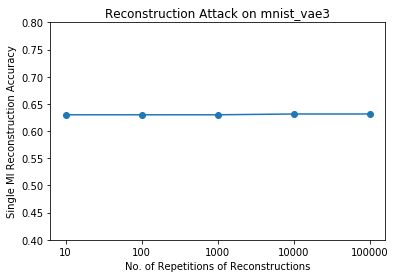

In [56]:
x = [int(x.replace('recon_attack_', '')) for x in log['attacks']]
y = [v['reconstruction_accuracy_single'] for v in values.values()]
plt.xticks(range(len(x)), x)
plt.ylim(0.4, 0.8)
plt.plot(range(len(x)), y, marker='o')
plt.xlabel('No. of Repetitions of Reconstructions')
plt.ylabel('Single MI Reconstruction Accuracy')
plt.title('Reconstruction Attack on mnist_vae3')
# plt.show()
plt.savefig('mnist_vae3_recon_attack_single_mi')

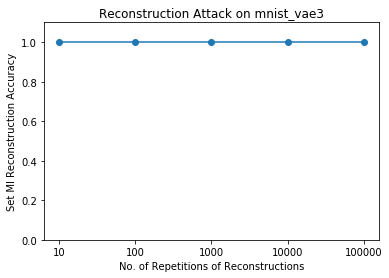

In [57]:
x = [int(x.replace('recon_attack_', '')) for x in log['attacks']]
y = [v['reconstruction_accuracy_set'] for v in values.values()]
plt.xticks(range(len(x)), x)
plt.ylim(0, 1.1)
plt.plot(range(len(x)), y, marker='o')
plt.xlabel('No. of Repetitions of Reconstructions')
plt.ylabel('Set MI Reconstruction Accuracy')
plt.title('Reconstruction Attack on mnist_vae3')
# plt.show()
plt.savefig('mnist_vae3_recon_attack_set_mi')

## Compare multiple experiments

In [106]:
experiment_ids = [9382]
logs = list()

values = dict()

for eid in experiment_ids:

    # Import results
    with open('experiments/experiment_' + str(eid) + '.json') as f:
        log = json.loads(f.read())
    #logs.append(log)
    
    print('Loaded experiment log with id ' + str(eid))
    print('Performed attacks: {0}'.format(log['attacks']))
    print('Repetitions: {0}'.format(len(log[log['attacks'][0]]['results'])))
    
    attack = list(log.keys())[-1] # does this always work?
    
    results = log[attack]['results']
    config_name = log[attack]['base_config']
    
    with open('configs/' + str(config_name) + '.json') as f:
        attack_config = json.loads(f.read())
    with open('configs/' + str(attack_config['model_config']) + '.json') as f:
        model_config = json.loads(f.read())
    
    model_type = model_config['type']
    base_attack_name = attack_config['attack_type']
    
    if base_attack_name not in values.keys():
        values[base_attack_name] = dict()
    
    if 'mc_attack' in log[attack]['attack_type']:
        
        #Only use median heuristic
        heuristic = 'median_perc'
            
        values[base_attack_name][model_type] = dict()
        values[base_attack_name][model_type]['single'] = dict()
        values[base_attack_name][model_type]['set'] = dict()

        # Single MI Accuracy
        single_mi_acc = calc_mc_accuracy(heuristic, '50_perc_mc_attack_log', results)
        values[base_attack_name][model_type]['single']['mean'] = single_mi_acc
        values[base_attack_name][model_type]['single']['std'] = np.std([x[heuristic]['50_perc_mc_attack_log'] for x in results])
        # print(heuristic, single_mi_acc)

        # Set MI Accuracy
        set_mi_acc = calc_mc_set_accuracy(heuristic, '50_perc_mc_attack_log', results)
        values[base_attack_name][model_type]['set']['mean'] = set_mi_acc
        accuracies = np.array([x[heuristic]['50_perc_mc_attack_log'] for x in results])
        advantages = calc_advantage(accuracies)
        probabilities = np.array(list(map(calc_probability, advantages)))
        values[base_attack_name][model_type]['set']['std'] = np.std(probabilities)
        # print(set_mi_acc)
    
    else:
        # reconstruction attack
        pass
    

Loaded experiment log with id 9382
Performed attacks: ['pca_mc_attack_1000', 'pca_mc_attack_10000', 'pca_mc_attack_100000', 'pca_mc_attack_1000000']
Repetitions: 10


In [105]:
def calc_probability(advantage):
    if advantage > 0:
        prob = 1
    elif advantage == 0:
        prob = 0.5
    elif advantage < 0:
        prob = 0
    return prob

def calc_advantage(accuracies):
    advantages = (accuracies - 0.5) * 2
    return advantages

In [107]:
values

{'pca_mc_attack': {'GAN': {'single': {'mean': 0.49800000000000005,
    'std': 0.041182520563948014},
   'set': {'mean': 0.55, 'std': 0.4716990566028302}}}}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='royalblue', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, womenMeans, width, color='seagreen', yerr=womenStd)

# add some
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )


In [3]:
log

{'id': 1270,
 'attacks': ['pca_mc_attack'],
 'pca_mc_attack_1000': {'attack_type': 'pca_mc_attack',
  'results': [{'1': {'50_perc_mc_attack_log': 0.52,
     '50_perc_mc_attack_eps': 0.52,
     '50_perc_mc_attack_frac': 0.54,
     'successful_set_attack_log': True,
     'successful_set_attack_eps': True,
     'successful_set_attack_frac': True,
     'set_attack_log_vals': [0.11352838501691924, 0.11328629051553953],
     'set_attack_eps_vals': [1.0018, 0.9982000000000001],
     'set_attack_frac_vals': [1.1280467083215517, 1.1241757500702776]},
    '0.1': {'50_perc_mc_attack_log': 0.49,
     '50_perc_mc_attack_eps': 0.51,
     '50_perc_mc_attack_frac': 0.49,
     'successful_set_attack_log': True,
     'successful_set_attack_eps': False,
     'successful_set_attack_frac': True,
     'set_attack_log_vals': [0.007143509850873135, 0.007119893457452385],
     'set_attack_eps_vals': [0.10000000000000003, 0.10000000000000003],
     'set_attack_frac_vals': [0.10749184922373442, 0.107466227011662